Version 4

In [1]:
import xarray as xr
from products.plot_settings import METEOFRANCE_VAR_NAME, NASA_L3_VAR_NAME, NASA_PSEUDO_L3_VAR_NAME


analysis_type='scatter'
analysis_folder = f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/{analysis_type}'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_meteofrance_l3_FSC_vs_s2_theia_FSC_375m.nc", decode_cf=True)
mf_metrics_ds = mf_metrics_ds.assign_coords({'forest_mask': ['no_forest', 'forest']})
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_nasa_l3_FSC_vs_s2_theia_FSC_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = nasa_l3_metrics_ds.where(nasa_l3_metrics_ds>0, drop=True)
nasa_l3_metrics_ds = nasa_l3_metrics_ds.assign_coords({'forest_mask_bins': ['no_forest', 'forest']}).rename({'forest_mask_bins': 'forest_mask'})
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_nasa_pseudo_l3_FSC_vs_s2_theia_FSC_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = nasa_pseudo_l3_metrics_ds.where(nasa_pseudo_l3_metrics_ds>0, drop=True)
nasa_pseudo_l3_metrics_ds = nasa_pseudo_l3_metrics_ds.assign_coords({'forest_mask_bins': ['no_forest', 'forest']}).rename({'forest_mask_bins': 'forest_mask'})
analyses_dict_v4 = {METEOFRANCE_VAR_NAME: mf_metrics_ds,  NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds,NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

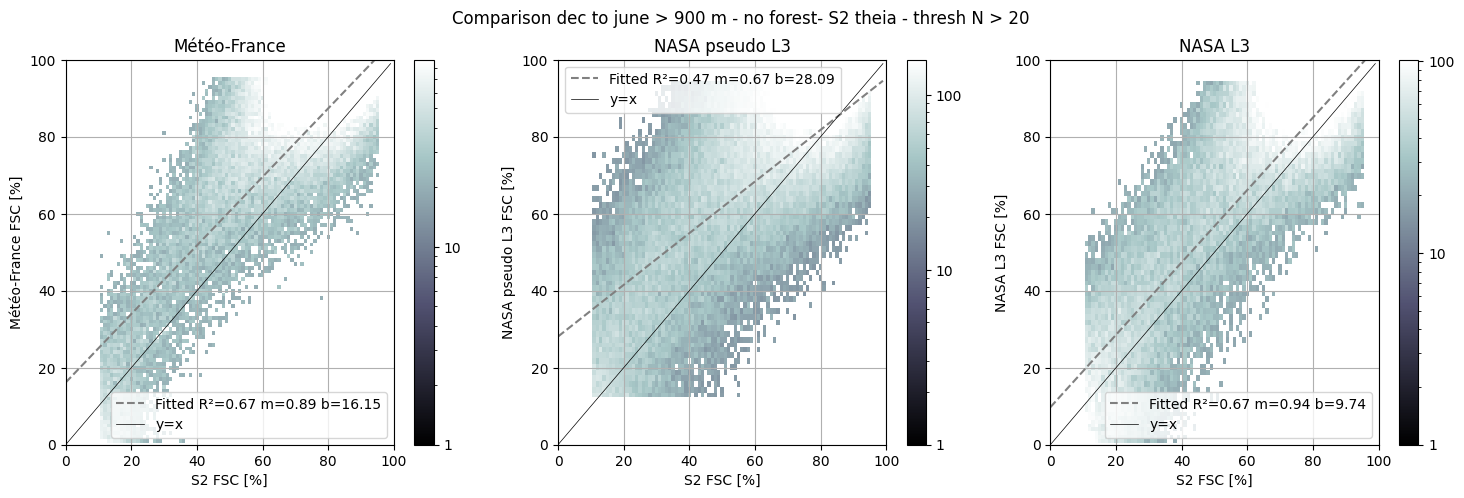

In [2]:
from postprocess.scatter_plot import fancy_scatter_plot
from products.plot_settings import PRODUCT_PLOT_NAMES
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,len(analyses_dict_v4), figsize=(6*len(analyses_dict_v4), 5))
fig.suptitle('Comparison dec to june > 900 m - no forest- S2 theia - thresh N > 20')

selection_dict = {k: v.sel(altitude_bins=slice(900,None)).sel(time=slice('2023-12', '2024-06')) for k,v in analyses_dict_v4.items()}
for i, (k,v) in enumerate(selection_dict.items()):
    reduced_v = v.sel(ref_bins=slice(10,95),forest_mask=['no_forest'],test_bins=slice(1,95)).sum(dim=('forest_mask','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v.rename({'ref_bins': 'x', 'test_bins': 'y'}), ax=ax[i],figure=fig,low_threshold=20,smoothing_window_size=0)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")

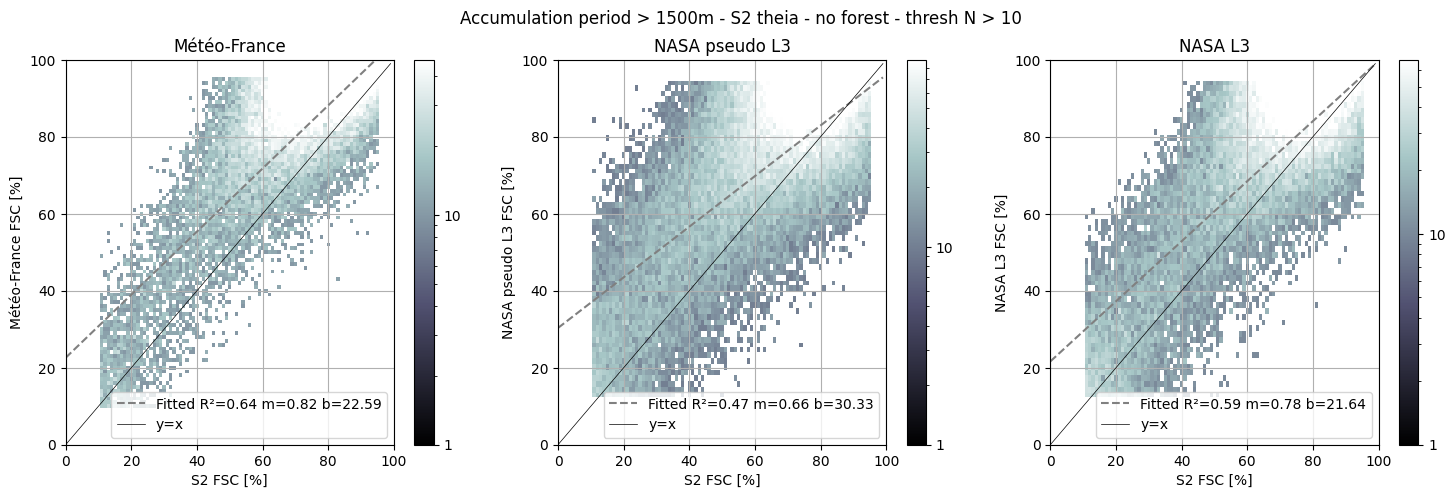

In [3]:
from postprocess.scatter_plot import fancy_scatter_plot
from products.plot_settings import PRODUCT_PLOT_NAMES
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,len(analyses_dict_v4), figsize=(6*len(analyses_dict_v4), 5))
fig.suptitle('Accumulation period > 1500m - S2 theia - no forest - thresh N > 10')

# selection_dict = {k: v.sel(altitude_bins=slice(1500,None)) for k,v in analyses_dict_v3.items()}

selection_dict = {k: v.sel(time=slice('2023-12','2024-02')).sel(altitude_bins=slice(1500,None))  for k,v in analyses_dict_v4.items()}
for i, (k,v) in enumerate(selection_dict.items()):
    reduced_v = v.sel(ref_bins=slice(10,95),forest_mask=['no_forest'],test_bins=slice(10,95)).sum(dim=('forest_mask','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v.rename({'ref_bins': 'x', 'test_bins': 'y'}), ax=ax[i],figure=fig,low_threshold=10,smoothing_window_size=0)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")

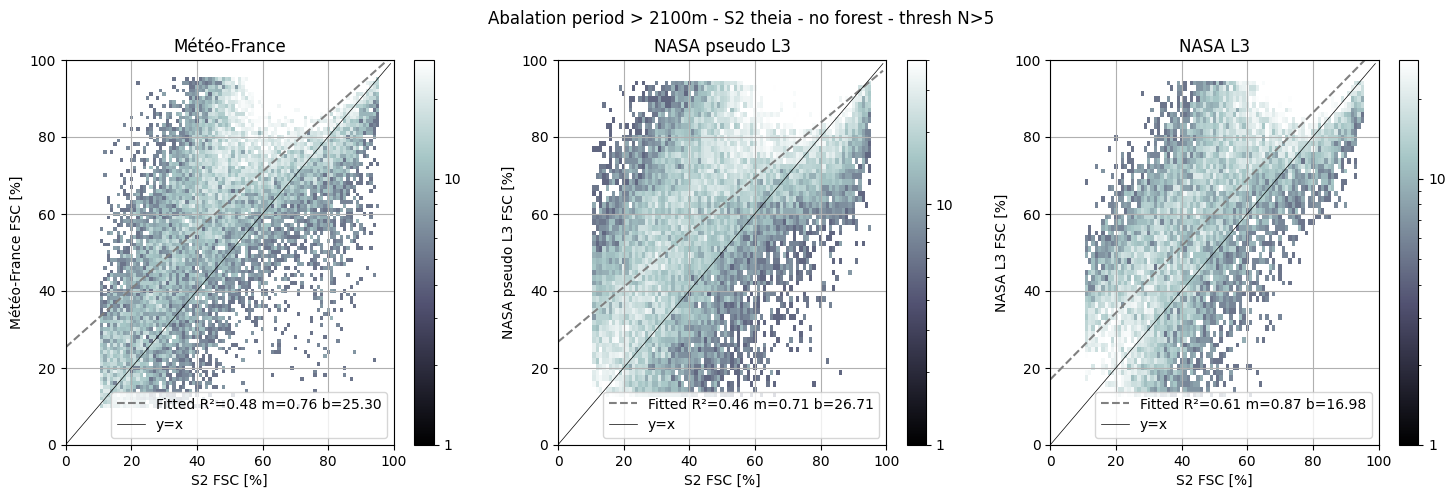

In [5]:
from postprocess.scatter_plot import fancy_scatter_plot
from products.plot_settings import PRODUCT_PLOT_NAMES
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,len(analyses_dict_v4), figsize=(6*len(analyses_dict_v4), 5))
fig.suptitle('Abalation period > 2100m - S2 theia - no forest - thresh N>5')

selection_dict = {k: v.sel(time=slice('2024-03','2024-07')).sel(altitude_bins=slice(2100,None))  for k,v in analyses_dict_v4.items()}
for i, (k,v) in enumerate(selection_dict.items()):
    reduced_v = v.sel(ref_bins=slice(10,95),forest_mask=['no_forest'],test_bins=slice(10,95)).sum(dim=('forest_mask','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v.rename({'ref_bins': 'x', 'test_bins': 'y'}), ax=ax[i],figure=fig,low_threshold=5,smoothing_window_size=0)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")

Cross comparison NASA Météo-France

In [6]:
import xarray as xr

scatter_nasa_l3_ndsi_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_nasa_vs_meteofrance_l3_375m.nc", decode_cf=True).sel(altitude_bins=slice(900,None)).sel(time=slice('2023-12', '2024-06'))
scatter_nasa_l3_ndsi_ds = scatter_nasa_l3_ndsi_ds.where(scatter_nasa_l3_ndsi_ds>0, drop=True)
scatter_nasa_l3_ndsi_ds = scatter_nasa_l3_ndsi_ds.assign_coords({'forest_mask_bins': ['no_forest', 'forest']})

Text(0, 0.5, 'MF FSC [%]')

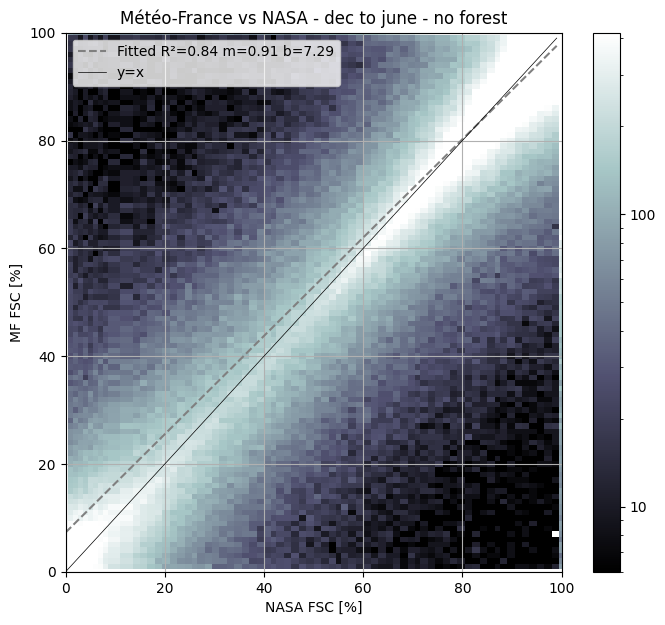

In [7]:
fig, ax = plt.subplots(figsize=(8, 7))
reduced_v = scatter_nasa_l3_ndsi_ds.sel(ref_bins=slice(1,100),forest_mask_bins=['no_forest'],test_bins=slice(1,100), time=slice('2023-12','2024-06'), altitude_bins=slice(900, None)).sum(dim=('forest_mask_bins','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v.rename({'ref_bins': 'x', 'test_bins': 'y'}), ax=ax,figure=fig,smoothing_window_size=0)
ax.set_title('Météo-France vs NASA - dec to june - no forest')
ax.set_xlabel("NASA FSC [%]")
ax.set_ylabel("MF FSC [%]")

NDSI regression

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
import xarray as xr
analysis_type='scatter'
analysis_folder = f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/{analysis_type}'



nasa_l3_ndsi_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_nasa_NDSI_vs_s2_theia_FSC_375m.nc", decode_cf=True)
nasa_l3_ndsi_ds = nasa_l3_ndsi_ds.where(nasa_l3_ndsi_ds>0, drop=True)
nasa_l3_ndsi_ds = nasa_l3_ndsi_ds.assign_coords({'forest_mask_bins': ['no_forest', 'forest']})


In [9]:
def gascoin(ndsi, f_veg):
    f_snow_toc = 0.5 * np.tanh(2.65*ndsi - 1.42) + 0.5
    return np.minimum(1, f_snow_toc/(1-f_veg))

def salomonson_appel(ndsi):
    return 1.45*ndsi - 0.01

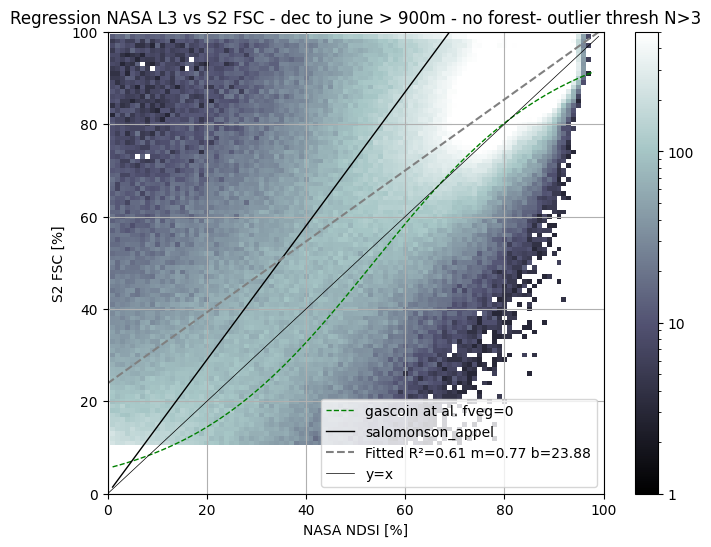

In [10]:
import matplotlib.pyplot as plt

import xarray as xr
analysis_type='scatter'
analysis_folder = f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/{analysis_type}'

fig, ax = plt.subplots(figsize=(8, 6))
reduced_v = nasa_l3_ndsi_ds.sel(ref_bins=slice(1,99),test_bins=slice(1,99), time=slice('2023-12','2024-06'), altitude_bins=slice(900,None)).sum(dim=('forest_mask_bins','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']

xax = reduced_v.test_bins.values
fit_g = gascoin(xax*0.01, f_veg=0)*100
ax.plot(xax, fit_g,'g--', linewidth=1, label='gascoin at al. fveg=0')
ax.plot(xax, salomonson_appel(xax), 'k', linewidth=1, label='salomonson_appel')
scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v.rename({'ref_bins': 'y', 'test_bins': 'x'}), ax=ax,figure=fig, smoothing_window_size=None,low_threshold=3)

ax.set_title('Regression NASA L3 vs S2 FSC - dec to june > 900m - no forest- outlier thresh N>3')
ax.set_ylabel("S2 FSC [%]")
ax.set_xlabel("NASA NDSI [%]")
ax.set_ylim(0,100)
ax.legend()

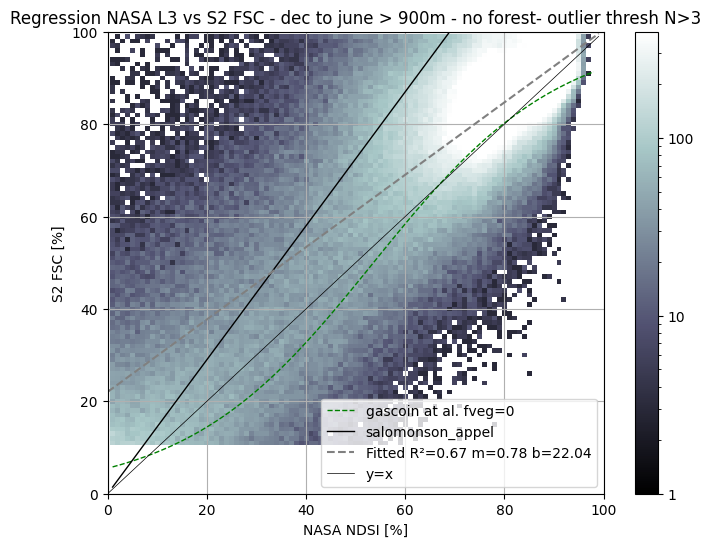

In [11]:
import matplotlib.pyplot as plt

import xarray as xr
analysis_type='scatter'
analysis_folder = f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/{analysis_type}'

fig, ax = plt.subplots(figsize=(8, 6))
reduced_v = nasa_l3_ndsi_ds.sel(forest_mask_bins=['no_forest'],ref_bins=slice(1,99),test_bins=slice(1,99), time=slice('2023-12','2024-06'), altitude_bins=slice(900,None)).sum(dim=('forest_mask_bins','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']

xax = reduced_v.test_bins.values
fit_g = gascoin(xax*0.01, f_veg=0)*100
ax.plot(xax, fit_g,'g--', linewidth=1, label='gascoin at al. fveg=0')
ax.plot(xax, salomonson_appel(xax), 'k', linewidth=1, label='salomonson_appel')
scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v.rename({'ref_bins': 'y', 'test_bins': 'x'}), ax=ax,figure=fig, smoothing_window_size=None,low_threshold=3)

ax.set_title('Regression NASA L3 vs S2 FSC - dec to june > 900m - no forest- outlier thresh N>3')
ax.set_ylabel("S2 FSC [%]")
ax.set_xlabel("NASA NDSI [%]")
ax.set_ylim(0,100)
ax.legend()

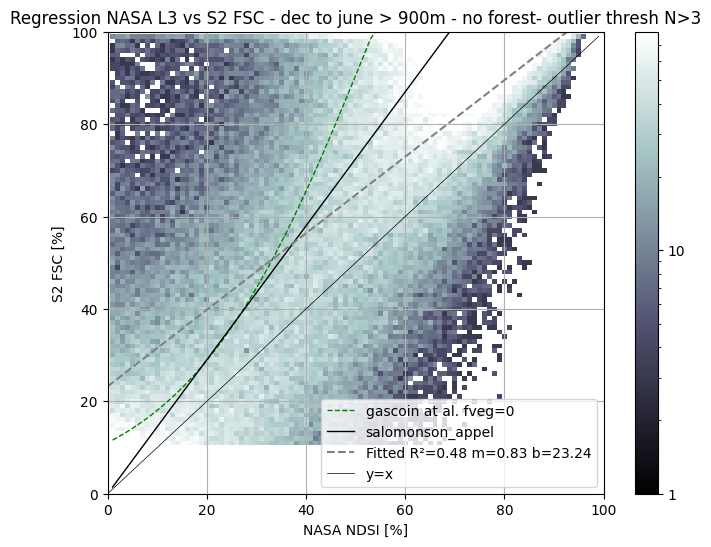

In [12]:
import matplotlib.pyplot as plt

import xarray as xr
analysis_type='scatter'
analysis_folder = f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/{analysis_type}'

fig, ax = plt.subplots(figsize=(8, 6))
reduced_v = nasa_l3_ndsi_ds.sel(forest_mask_bins=['forest'],ref_bins=slice(1,99),test_bins=slice(1,99), time=slice('2023-12','2024-06'), altitude_bins=slice(900,None)).sum(dim=('forest_mask_bins','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']

xax = reduced_v.test_bins.values
fit_g = gascoin(xax*0.01, f_veg=0.5)*100
ax.plot(xax, fit_g,'g--', linewidth=1, label='gascoin at al. fveg=0')
ax.plot(xax, salomonson_appel(xax), 'k', linewidth=1, label='salomonson_appel')
scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v.rename({'ref_bins': 'y', 'test_bins': 'x'}), ax=ax,figure=fig, smoothing_window_size=None,low_threshold=3)

ax.set_title('Regression NASA L3 vs S2 FSC - dec to june > 900m - no forest- outlier thresh N>3')
ax.set_ylabel("S2 FSC [%]")
ax.set_xlabel("NASA NDSI [%]")
ax.set_ylim(0,100)
ax.legend()

(-100.0, 100.0)

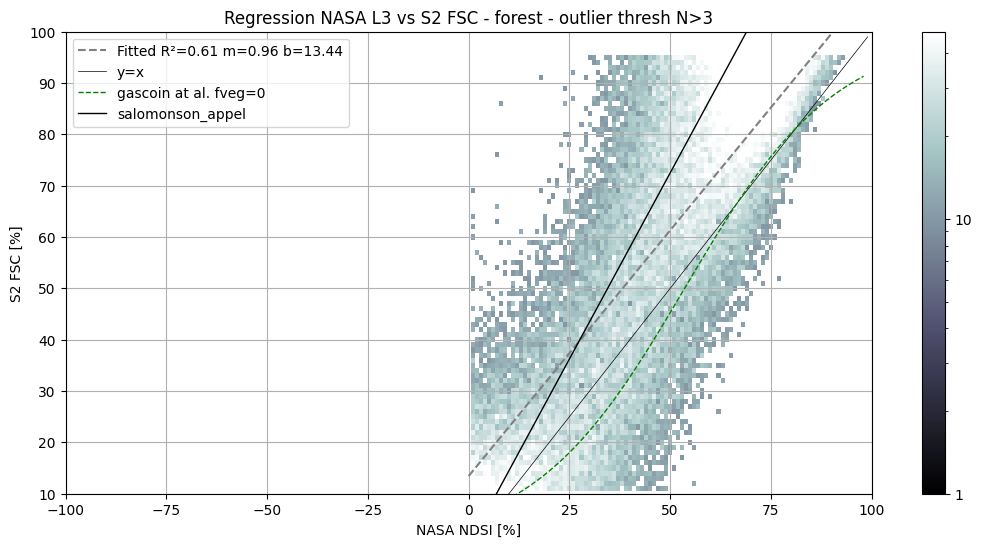

In [13]:

    


fig, ax = plt.subplots(figsize=(13, 6))
reduced_v = nasa_l3_ndsi_ds.sel(forest_mask_bins=['forest'],ref_bins=slice(10,95),test_bins=slice(1,99),time=slice('2023-12','2024-02'), altitude_bins=slice(900,None)).sum(dim=('forest_mask_bins','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v.rename({'ref_bins': 'y', 'test_bins': 'x'}), ax=ax,figure=fig, smoothing_window_size=None,low_threshold=10)
xax = reduced_v.test_bins.values
fit_g = gascoin(xax*0.01, f_veg=0.)*100
ax.plot(xax, fit_g,'g--', linewidth=1, label='gascoin at al. fveg=0')
ax.plot(xax, 1.45*xax-0.01, 'k', linewidth=1, label="salomonson_appel")
ax.legend()
ax.set_title('Regression NASA L3 vs S2 FSC - forest - outlier thresh N>3')
ax.set_ylabel("S2 FSC [%]")
ax.set_xlabel("NASA NDSI [%]")
ax.set_ylim(10,100)
ax.set_xlim(-100,100)

(-100.0, 100.0)

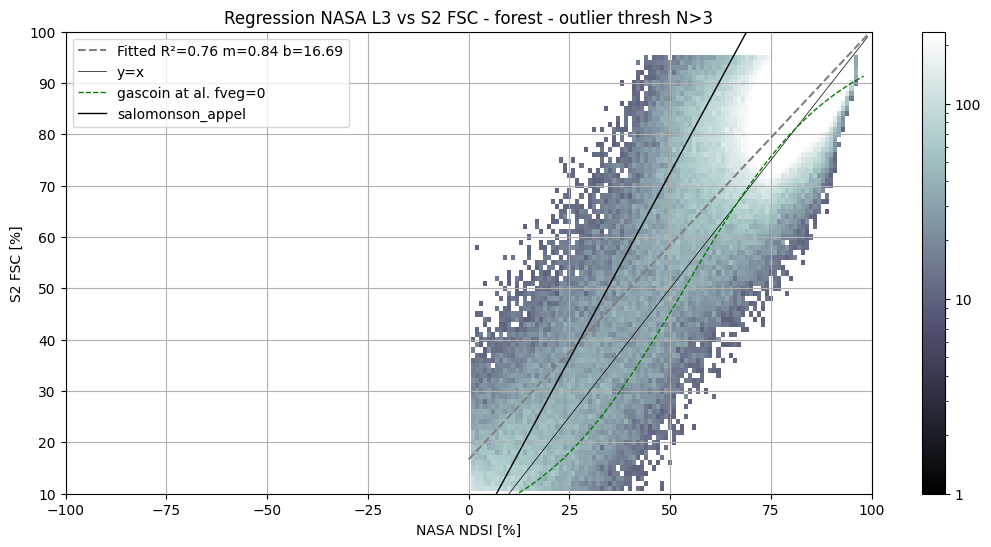

In [14]:

    


fig, ax = plt.subplots(figsize=(13, 6))
reduced_v = nasa_l3_ndsi_ds.sel(forest_mask_bins=['no_forest'],ref_bins=slice(10,95),test_bins=slice(1,99),time=slice('2024-02','2024-07'), altitude_bins=slice(900,None)).sum(dim=('forest_mask_bins','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v.rename({'ref_bins': 'y', 'test_bins': 'x'}), ax=ax,figure=fig, smoothing_window_size=None,low_threshold=10)
xax = reduced_v.test_bins.values
fit_g = gascoin(xax*0.01, f_veg=0.)*100
ax.plot(xax, fit_g,'g--', linewidth=1, label='gascoin at al. fveg=0')
ax.plot(xax, 1.45*xax-0.01, 'k', linewidth=1, label="salomonson_appel")
ax.legend()
ax.set_title('Regression NASA L3 vs S2 FSC - forest - outlier thresh N>3')
ax.set_ylabel("S2 FSC [%]")
ax.set_xlabel("NASA NDSI [%]")
ax.set_ylim(10,100)
ax.set_xlim(-100,100)